<a href="https://colab.research.google.com/github/Ssactl/AH2174_HT23_Traffic-Simulation-Modelling-and-Applications/blob/main/AH2174_2023_project1_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single-server queueing system simulation


Consider a single-server queueing system model applied for simulating a toll station. Assume that vehicle arrivals are modeled as a Possion process with arrival rate λ while the service time has the exponential distribution with service rate μ.

Q1: Please program a stochastic simulation machine on the single-server queueing model system according to the proposed approach in the Simulation book
(Chapter 7) of Sheldon M. Ross and answer the following questions:

*   what is the expected queue length? what is its variance? plot the distribution
of simulated queue length values.  
*   what is the probability that the waiting time is higher than 3 minutes i.e.
Pr(W > 180sec)? plot the distribution of simulated waiting times

Try different λ and μ such that λ/μ = 0.6 and λ/μ = 0.9. Plot the results of the
cases after a large number of simulation runs

The approach menthioned in the book is called "discrete event simulation approach"

In [4]:
import numpy as np
import matplotlib.pyplot as plt

We first tried to write a function that can generate the random number. These numbers are represented as the arrival time of vehicles and they follow Possion distribution. We use the lab1 exercise and the Ross book as references to write this method.

Generated Arrival Time Random Variables: [9, 8, 14, 8, 12, 10, 11, 9, 11, 10, 5, 14, 12, 10, 16, 12, 11, 9, 7, 11, 12, 10, 12, 7, 19, 8, 9, 10, 10, 6, 6, 13, 7, 13, 4, 11, 6, 7, 12, 9, 13, 11, 3, 11, 7, 9, 16, 12, 6, 11, 10, 8, 5, 16, 11, 5, 7, 13, 16, 12, 11, 14, 12, 7, 12, 7, 9, 3, 16, 9, 11, 14, 8, 12, 8, 11, 15, 8, 7, 11, 9, 14, 10, 9, 15, 10, 11, 14, 10, 3, 7, 5, 12, 7, 6, 9, 13, 9, 8, 10, 10, 8, 7, 6, 6, 8, 7, 4, 6, 10, 8, 11, 7, 12, 5, 6, 10, 4, 10, 14, 7, 10, 11, 14, 12, 9, 9, 24, 10, 10, 13, 6, 13, 3, 9, 8, 10, 10, 9, 9, 7, 10, 9, 8, 7, 9, 10, 13, 9, 10, 12, 6, 12, 4, 9, 13, 6, 20, 5, 11, 12, 10, 9, 12, 6, 11, 10, 10, 8, 8, 10, 13, 12, 13, 7, 12, 13, 6, 10, 12, 13, 9, 9, 8, 12, 13, 3, 12, 4, 6, 10, 13, 10, 10, 15, 15, 11, 10, 14, 10, 11, 9, 12, 5, 7, 11, 13, 10, 13, 6, 14, 9, 11, 14, 6, 12, 12, 15, 5, 12, 10, 9, 12, 14, 3, 11, 14, 11, 10, 12, 10, 12, 5, 11, 10, 9, 9, 5, 11, 14, 5, 7, 12, 10, 7, 19, 11, 9, 15, 8, 11, 9, 7, 6, 9, 12, 12, 9, 7, 16, 11, 8, 4, 8, 13, 8, 9, 11, 5, 6

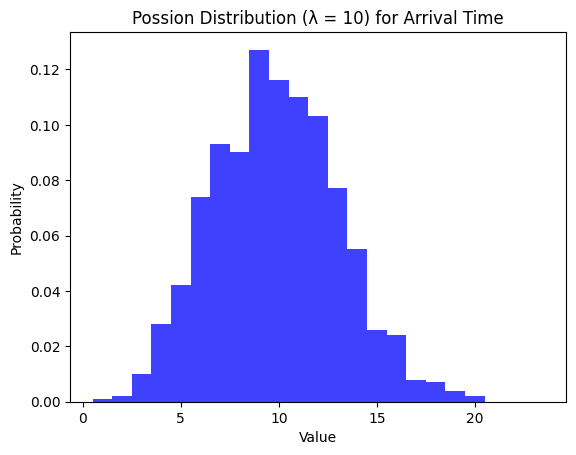

In [8]:
def generate_arrival_time_random_variable(lmbda,size):
  U = np.random.random(size)
  arrival_times = []

  for u in U:
    i = 0
    p = np.exp(-lmbda)
    F = p

    while u >= F:
        i += 1
        p = (lmbda * p) / i
        F += p

    arrival_times.append(i)

  return arrival_times

# Example Usage:
lambda_parameter = 10
random_variable_size = 1000

# Generate random numbers following a Poisson distribution
arrival_time_random_variable = generate_arrival_time_random_variable(lambda_parameter, random_variable_size)

# Print the generated random variables
print("Generated Arrival Time Random Variables:", arrival_time_random_variable)

# Plot the histogram of generated arrival time random variables
plt.hist(arrival_time_random_variable, bins=np.arange(min(arrival_time_random_variable), max(arrival_time_random_variable) + 1) - 0.5, density=True, alpha=0.75, color='b')
plt.title(f'Possion Distribution (λ = {lambda_parameter}) for Arrival Time')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

Then we tried to write a function that generate random varibale which are representing the service time. The service time follows exponential distribution with service rate  μ. We still use the lab1 exercise and the Ross book as references.

Generated Service Time Random Variables: [2.30574529e-01 3.56782811e-01 1.63779524e-01 1.17908727e+00
 2.89023704e-01 7.91144177e-01 3.30743584e-01 1.08074736e+00
 2.59557330e-01 6.87187608e-02 2.03142428e-01 2.81031909e-01
 9.79637078e-02 4.69396496e-01 4.23384057e-01 2.08756888e-01
 6.92621867e-01 1.17775479e-01 1.34893511e+00 1.40757687e-01
 6.38841560e-02 4.99601373e-01 4.30856776e-01 1.96261742e-01
 9.84127226e-01 3.84538763e-01 4.93162021e-01 1.65729365e-01
 1.18845004e-02 4.24746952e-02 3.20483757e-01 1.32323880e-01
 9.82935279e-01 1.03811334e+00 1.10368177e+00 4.25291174e-01
 3.24046319e-01 7.98033514e-02 2.90264158e-01 9.97566256e-01
 3.70030262e-01 4.02349618e-01 8.97285966e-02 4.14482311e-01
 8.36871093e-02 3.08665664e-01 4.68369086e-01 3.04389154e-01
 5.35301093e-04 3.62478014e-02 9.20114041e-01 3.92026942e-01
 1.33753660e-01 8.80694686e-02 5.14930924e-01 6.00866894e-01
 1.26482659e-01 4.59974531e-02 5.10851775e-01 6.58891058e-02
 2.58933080e-02 2.26235050e-01 2.01739254e-0

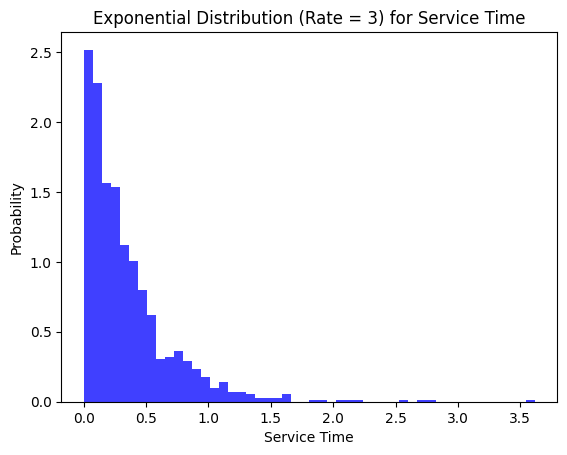

In [3]:
def generate_service_time_random_variable(mu, size):
    # Generate random numbers from a uniform distribution (0, 1)
    u = np.random.rand(size)

    # Generate service time random variables using the inverse transform method
    service_time_random_variable = - (1 / mu) * np.log(u)

    return service_time_random_variable

# Example Usage:
mu_parameter = 3  # Service rate
random_variable_size = 1000

# Generate random numbers following an exponential distribution with rate mu
service_time_random_variable = generate_service_time_random_variable(mu_parameter, random_variable_size)

# Print the generated random variables
print("Generated Service Time Random Variables:", service_time_random_variable)

# Plot the histogram of generated service time random variables
plt.hist(service_time_random_variable, bins=50, density=True, alpha=0.75, color='b')
plt.title(f'Exponential Distribution (Rate = {mu_parameter}) for Service Time')
plt.xlabel('Service Time')
plt.ylabel('Probability')
plt.show()


Below is a function that can simulate the single-server queueing situation by referring to the Ross book.

In [ ]:
def single_server_queue_simulation(simulation_time,arrival_time_random_variable,service_time_random_variable):

  # Initialization
  time=0
  arrival_time=np.random.choice(arrival_time_random_variable)
  service_time=float('inf') # No service initially
  queue_length = 0 # numebr of customers that are waiting
  event_list = []
  arrival_time_of_customer_i=[]
  depature_time_of_customer_i=[]
  queue_length_list=[]
  time_of_last_customer_departure=0;

  # Simulation loop
  while time < simulation_time:
    # if the next event is a new customer arriving
    if arrival_time <= service_time:
      time = arrival_time
      arrival_time += np.random.choice(arrival_time_random_variable) # update it to the next arrival
      queue_length += 1
      event_list.append(("Arrival", time))
      arrival_time_of_customer_i.append(time)
      # is the system had been empty, we need to generate the service time of the new customer
      if queue_length==1:
        service_time=time+np.random.choice(service_time_random_variable)

    # if the next event is the service completing and the customer leaving
    else:
      time = service_time
      queue_length-=1
      event_list.append(("Departure", time))
      depature_time_of_customer_i.append(time)
      if queue_length > 0:
        service_time=time+np.random.choice(service_time_random_variable)
      else:
        service_time=float('inf')

    queue_length_list.append(queue_length)

  # When we reach the end of the simulation time we set
  while queue_length>0:
    time=service_time
    queue_length-=1
    event_list.append(("Departure", time))
    depature_time_of_customer_i.append(time)
    service_time=time+np.random.choice(service_time_random_variable)
    queue_length_list.append(queue_length)

  time_of_last_customer_departure=max(time-simulation_time,0)

  return event_list,arrival_time_of_customer_i,depature_time_of_customer_i,queue_length_list


Then we write a function that can run a large number of simulation for tring different λ and μ



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(question_num,num_runs,simulation_time,random_variable_size,arrival_rate,lambda_over_mu,question,constant_service_time=90):
  service_rate = arrival_rate / lambda_over_mu
  arrival_time_random_variable = generate_arrival_time_random_variable(arrival_rate, random_variable_size)
  if question_num==1:
    service_time_random_variable = generate_service_time_random_variable(service_rate, random_variable_size)
  else:
    service_time_random_variable = np.full(random_variable_size, constant_service_time)


  # Perform a large number of simulation runs
  queue_lengths = []
  waiting_times = []

  for _ in range(num_runs):
    result = single_server_queue_simulation(simulation_time, arrival_time_random_variable, service_time_random_variable)
    queue_lengths.extend(result[3])
    waiting_times.extend([departure - arrival for arrival, departure in zip(result[1], result[2])])

  # Plot the distribution of simulated queue lengths
  plt.hist(queue_lengths, bins=20, edgecolor='black')
  plt.title(f'Distribution of Simulated Queue Lengths (λ/μ = {lambda_over_mu})')
  plt.xlabel('Queue Length')
  plt.ylabel('Frequency')
  plt.show()

  # Plot the distribution of simulated waiting times
  plt.hist(waiting_times, bins=20, edgecolor='black')
  plt.title(f'Distribution of Simulated Waiting Times (λ/μ = {lambda_over_mu})')
  plt.xlabel('Waiting Time')
  plt.ylabel('Frequency')
  plt.show()

  # Compute and print the expected queue length and its variance
  expected_queue_length = np.mean(queue_lengths)
  variance_queue_length = np.var(queue_lengths)
  print(f'λ/μ = {lambda_over_mu}')
  print(f'Expected Queue Length: {expected_queue_length}')
  print(f'Variance of Queue Length: {variance_queue_length}')

  # Compute and print the probability that the waiting time is higher than 3 minutes
  probability_waiting_time_greater_than_180_sec = np.mean(np.array(waiting_times) > 180)
  print(f'Pr(W > 180 sec): {probability_waiting_time_greater_than_180_sec}')



Question 1, λ/μ =  0.6


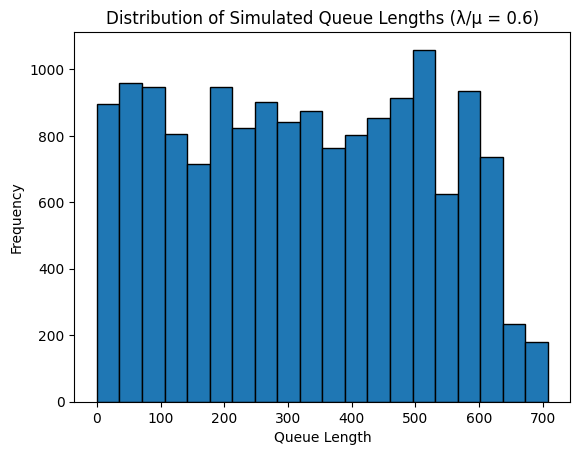

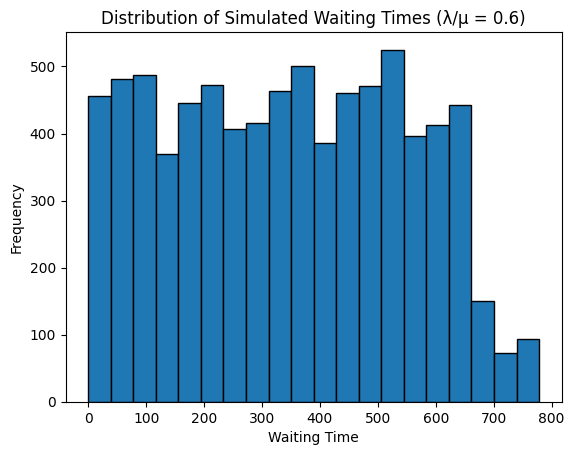

λ/μ = 0.6
Expected Queue Length: 323.39757207890744
Variance of Queue Length: 36270.055138263015
Pr(W > 180 sec): 0.7379868487607486
Question 2, λ/μ =  0.6
Calculated μ: 0.6666666666666666 vehicles/min
Calculated λ: 0.39999999999999997 vehicles/min


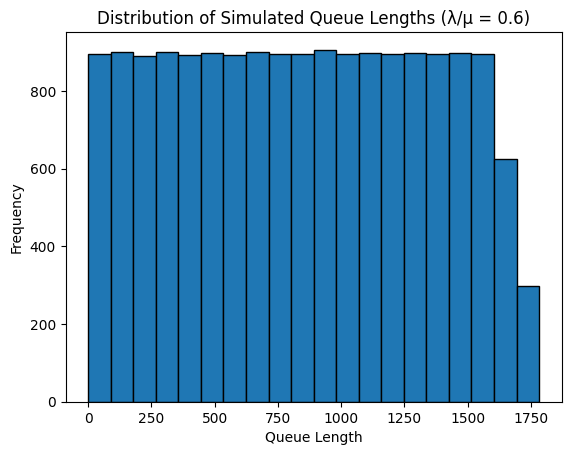

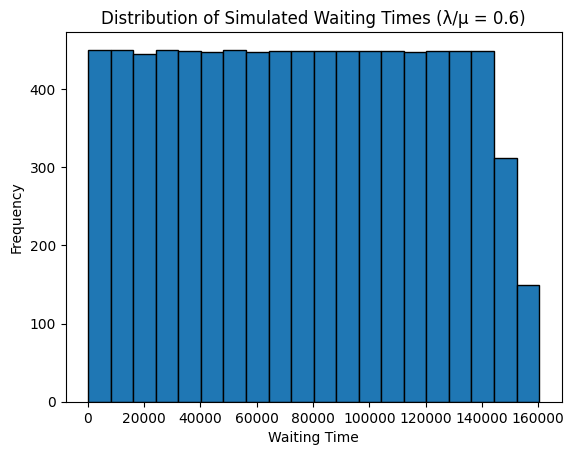

λ/μ = 0.6
Expected Queue Length: 849.1320046893318
Variance of Queue Length: 241337.52407534816
Pr(W > 180 sec): 0.9988276670574443
Question 1, λ/μ =  0.9


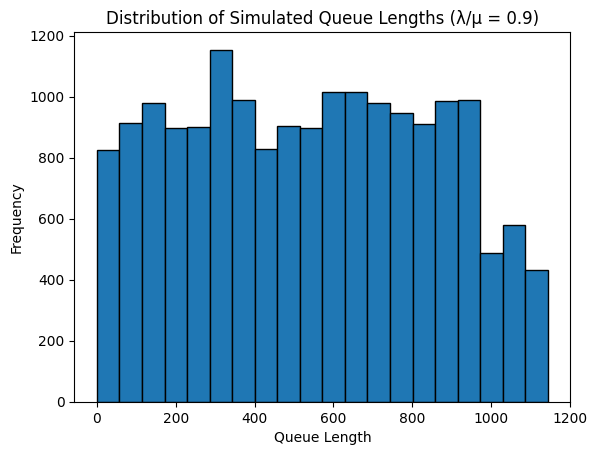

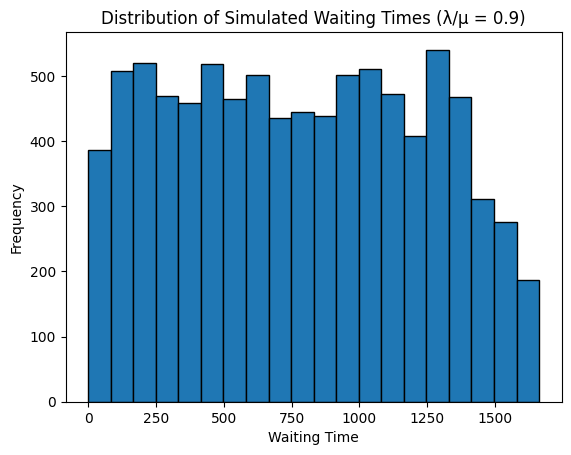

λ/μ = 0.9
Expected Queue Length: 540.0439074200136
Variance of Queue Length: 96203.41161876883
Pr(W > 180 sec): 0.8886997957794418
Question 2, λ/μ =  0.9
Calculated μ: 0.6666666666666666 vehicles/min
Calculated λ: 0.6 vehicles/min


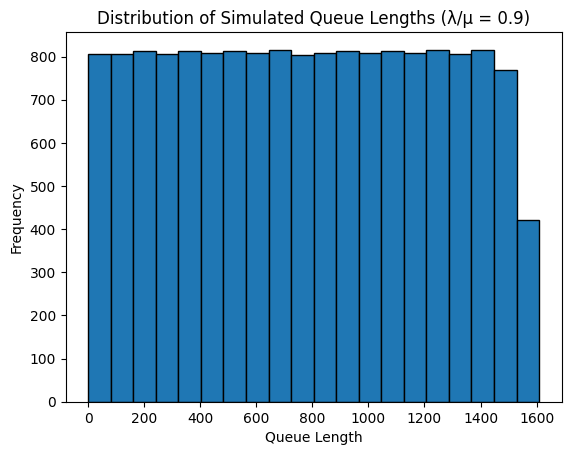

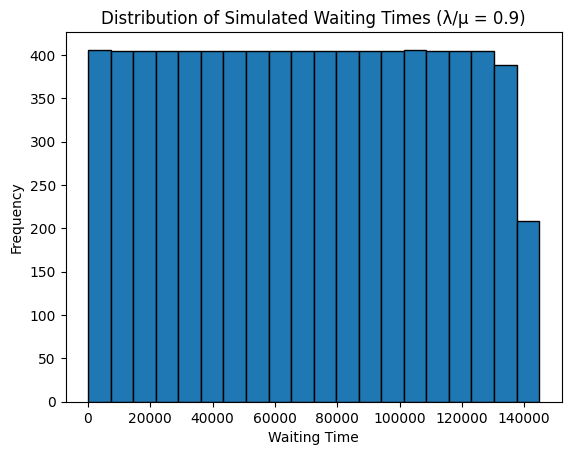

λ/μ = 0.9
Expected Queue Length: 784.1606644686786
Variance of Queue Length: 205074.44197795054
Pr(W > 180 sec): 0.9987319300025361


In [ ]:
# Simulation parameters
random_variable_size=1000
simulation_time = 1000 # unit as sec
lambda_over_mu_list=[0.6,0.9]
constant_service_time=90
num_runs=5

for i in lambda_over_mu_list:
  print('=================================')
  print('Question 1, λ/μ = ',i)
  print('=================================')
  arrival_rate = 0.6  #Arrival rate
  run_simulation(1,num_runs,simulation_time,random_variable_size,arrival_rate,i,constant_service_time)
  print('=================================')
  print('Question 2, λ/μ = ',i)
  print('=================================')
  # Calculate μ (service rate) based on the given constant service time
  calculated_mu = 1 / (constant_service_time / 60)  # Convert constant_service_time to minutes
  calculated_lambda = calculated_mu * i
  print(f'Calculated μ: {calculated_mu} vehicles/min')
  print(f'Calculated λ: {calculated_lambda} vehicles/min')
  print('=================================')
  run_simulation(2,num_runs,simulation_time,random_variable_size,arrival_rate,i,constant_service_time)